In [10]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact
from IPython.display import display, HTML

Populating the interactive namespace from numpy and matplotlib


# Microtubule polymerization

In [ ]:
HTML(
    """<video width="512" height="512"
    controls autoplay loop 
    src="https://storage.googleapis.com/my_slides/misc/Gatlin_etal.mp4"
    >""")

# Molecular motor transport on microtubules

In [7]:
HTML(
    """<video width="512" height="512"
    controls autoplay loop 
    src="https://storage.googleapis.com/my_slides/misc/kulic.2008d.appleuniversal.mp4"
    >""")

# Molecular motor transport in a neuron

In [8]:
HTML(
    """<video width="512" height="512"
    controls autoplay loop 
    src="https://storage.googleapis.com/my_slides/misc/bittins.2010.appleuniversal.mp4"
    >""")

# Cell migration

In [6]:
HTML(
    """<video width="512" height="512"
    controls autoplay loop 
    src="https://storage.googleapis.com/my_slides/misc/keren.2009a.mp4"
    >""")

# 1D Velocity-jump process
Suppose the position of a random walker is given by $X(t)$. The random walker moves with a constant velocity, and the velocity switches randomly between $v = \pm r$. That is,
$$ \dot{X} = v(N(t)), \quad v(N) = Nr,$$
where $N(t)$ is a two state Markov process (like the traffic light) that takes values of either $\{-1, 1\}$.
The transitions between the two states are as follows
$$ (N=-1) {{\alpha \atop\longrightarrow}\atop{\longleftarrow\atop \beta}} (N=1). $$

The 1D velocity-jump process is unbiased if $\alpha = \beta$. To see this, consider the average velocity given by
$$ E[v(N(t))] = \sum_{n=\{-1, 1\}} v(n)p(n, t)= v(-1)p(-1, t) + v(1)p(1, t) = (-r)\cdot p(-1, t) + rp(1, t).$$
The process is unbiased if 
$$\lim_{t\to\infty}E[v(N(t))] = 0,$$
which implies that
$$\lim_{t\to\infty}(-rp(-1, t) + rp(1, t)) = r\lim_{t\to\infty}(-p(-1, t) + p(1, t)) = 0.$$

The distribution $p(n, t)$ can be written as a vector with
$$ {\bf p}(t) = 
\begin{bmatrix}
p(-1, t) \\
p(1, t)
\end{bmatrix},
$$
It satisfies the Master equation given by
$$
\frac{d{\bf p}}{dt} = 
\begin{bmatrix}
-\alpha & \beta \\
\alpha & -\beta
\end{bmatrix}
{\bf p}.
$$
Let the stationary distribution be
$$ \lim_{t\to\infty}{\bf p}(t) = \rho.
$$
where
$$ \rho 
=
\begin{bmatrix}
\rho(-1) \\
\rho(1)
\end{bmatrix}
=
\begin{bmatrix}
\frac{\beta}{\alpha + \beta} \\
\frac{\alpha}{\alpha + \beta}
\end{bmatrix}.
$$
You can confirm this by checking that $A\rho = 0$.
As $t \to \infty$, the total fraction of time moving right is $\rho(1) = \frac{\alpha}{\alpha + \beta}$.
It follows that the fraction of time moving left is $1-\rho(1) = \rho(-1) = \frac{\beta}{\alpha + \beta}$.
The process is unbiased if $\rho(-1) = \rho(1) = 1/2$ which is true if and only if $\alpha = \beta$.



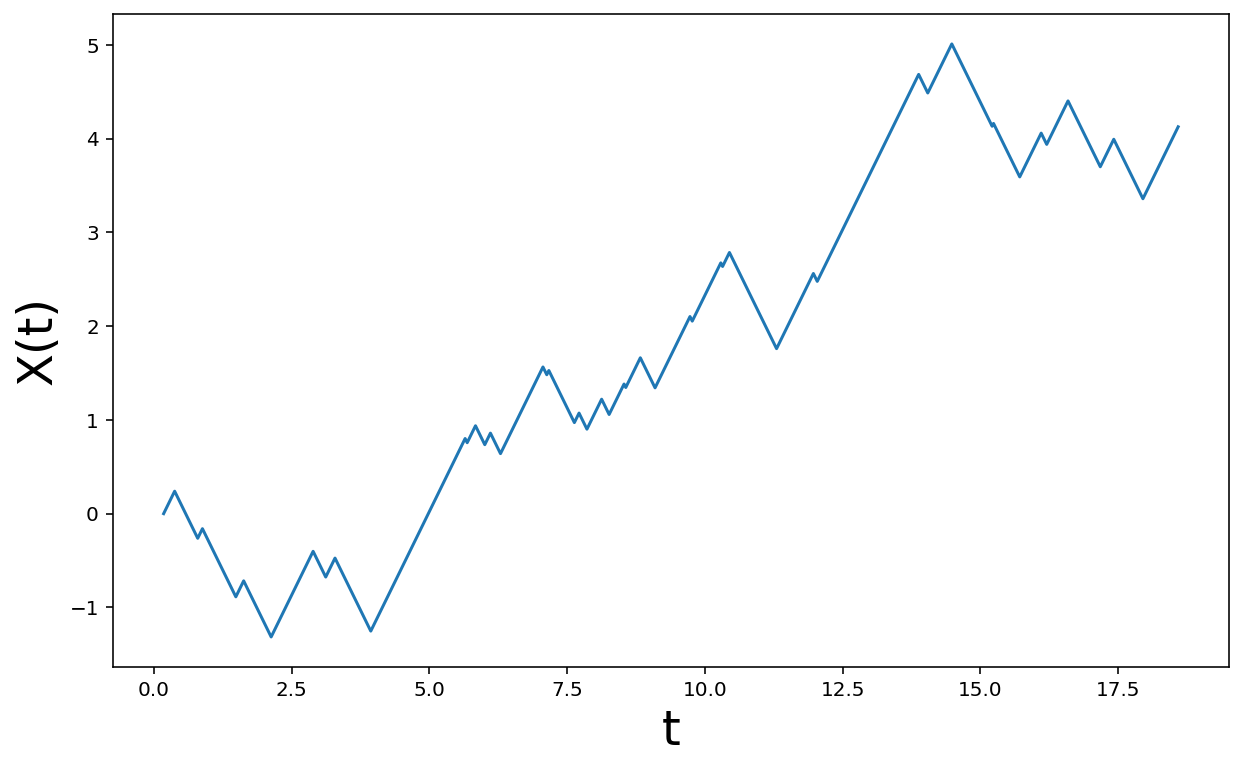

In [5]:
r = 1.2
alpha = 2.
beta = 2.
n0 = -1 ## must be -1 or 1
x0 = 0.
Nsteps = 50
T = zeros(Nsteps)
T[0] = 0
N = zeros(Nsteps)
N[0] = n0
X = zeros(Nsteps)
X[0] = x0
for j in arange(Nsteps): ## compute the rate using if statement
    n = N[j-1]
    u = rand(1)[0]
    if n == 1: 
        rate = beta
    else:
        rate = alpha
    tau = -log(u)/rate
    T[j] = T[j-1] + tau ## t += tau is the same as t = t + tau
    X[j] = X[j-1] + tau*(n*r) ## X(t + tau) = X(t) + tau*v(N)
    N[j] = -1 if n==1 else 1 ## you can put an if statement in one line like this
    

fig = figure(1, [10, 6])
plot(T, X)
xlabel('t', fontsize=24)
ylabel('X(t)', fontsize=24);

# Molecular motor transport model
Suppose that a cargo is being transported by multiple (+)-end and (-)-end motors. The (+)-end motors can be active while the (-)-end motor are inactive and vise versa. Suppose that we have an additional "paused" state when both types of motors are simultaneously active or simultaneously inactive, where the velocity is zero. 
The motion of the cargo is again given by
$$ \dot{X} = N(t) r. $$
However, now we have tansitions between three states according to
$$ 
(N=-1) 
{{\gamma \atop\longrightarrow}\atop{\longleftarrow\atop \beta}} 
(N = 0)
{{\alpha \atop\longrightarrow}\atop{\longleftarrow\atop \gamma}} 
(N=1)
$$


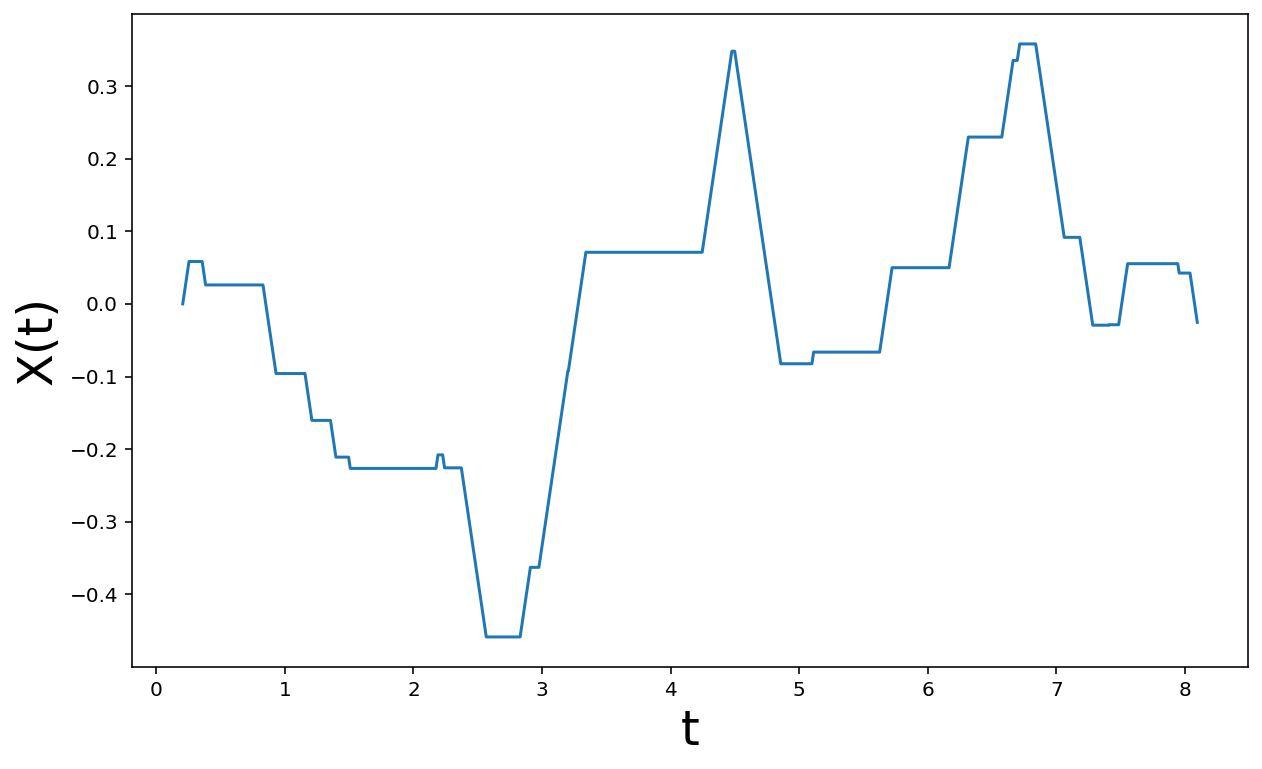

In [48]:
r = 1.2
alpha = 2.
beta = 2.
gamma = 10
n0 = -1 ## must be -1, 0, or 1
x0 = 0.
Nsteps = 50
T = zeros(Nsteps)
T[0] = 0
N = zeros(Nsteps)
N[0] = n0
X = zeros(Nsteps)
X[0] = x0
for j in arange(Nsteps): ## compute the rate using if statement
    n = N[j-1]
    u = rand(1)[0]
    if n == 0: 
        rate = alpha + beta
    else: ## n == -1 or n == 1
        rate = gamma
    tau = -log(u)/rate
    T[j] = T[j-1] + tau ## t += tau is the same as t = t + tau
    X[j] = X[j-1] + tau*(n*r) ## X(t + tau) = X(t) + tau*v(N)
    
    if n == 0: ## only the zero state has two arrows leaving
        u2 = rand(1)
        probability_of_left = beta/(alpha + beta)
        if u2 < probability_of_left:
            N[j] = -1
        else:
            N[j] = 1
    else:
        N[j] = 0
    

fig = figure(1, [10, 6])
plot(T, X)
xlabel('t', fontsize=24)
ylabel('X(t)', fontsize=24);

# 2D velocity-jump process
Let the position of the random walker by given by $X(t), Y(t)$. The walker moves at a constant speed $r>0$ in the direction of $\Theta(t) \in (0, 2\pi)$. The motion of the walker is given by
$$ 
\begin{align*}
  \dot{X} &= r\cos(\Theta(t)) \\
  \dot{Y} &= r\sin(\Theta(t)),
\end{align*}
$$
where $\Theta(t)$ is a random jump process. 
At a rate $\alpha > 0$, the walker choses a new direction $\Theta$ at random from the distribution $Q(\theta)$.
For simplicity, assume that the direction is uniformly distributed over $(0, 2\pi)$ so that $Q(\theta) = 1/(2\pi)$.

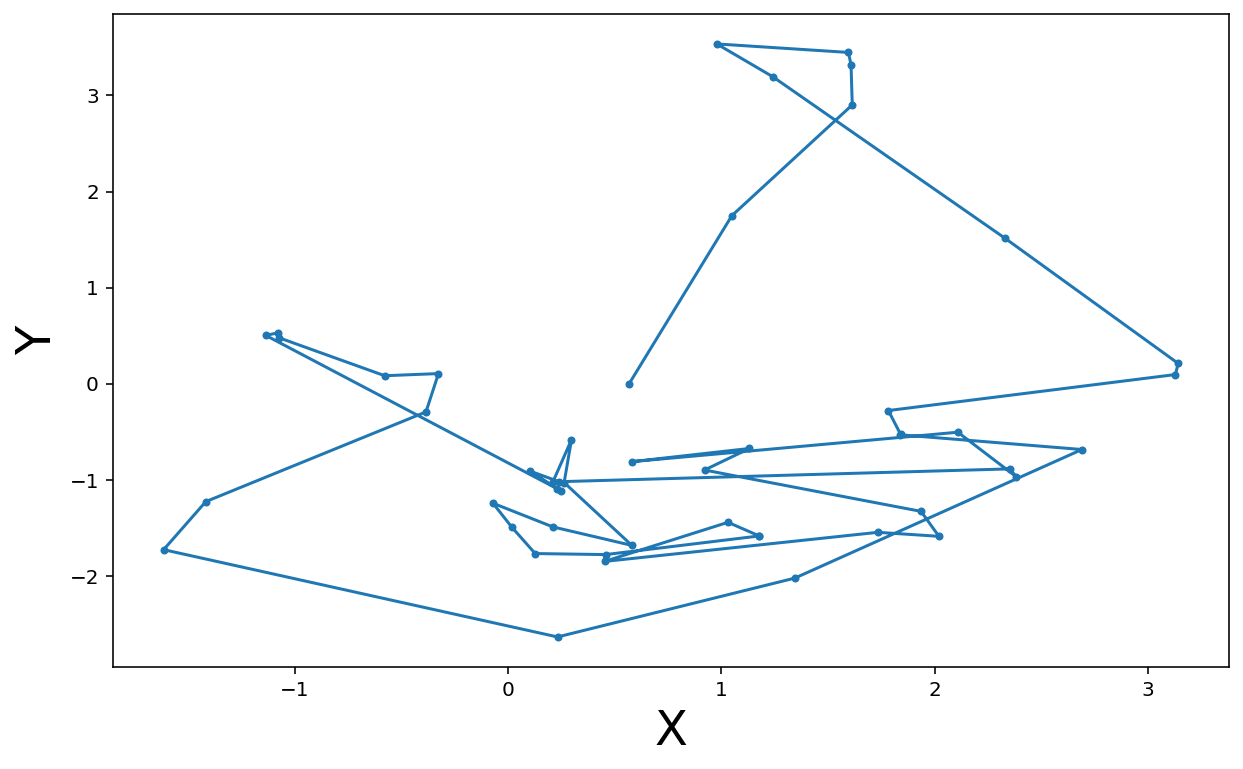

In [52]:
r = 1.2
alpha = 2.
theta0 = 0 # initial direction of motion (in radians between 0 and 2*pi)
x0 = 0.
y0 = 0.
Nsteps = 50
T = zeros(Nsteps)
T[0] = 0
Theta = zeros(Nsteps)
Theta[0] = n0
X = zeros(Nsteps)
X[0] = x0
Y = zeros(Nsteps)
Y[0] = y0
for j in arange(Nsteps): ## compute the rate using if statement
    theta = Theta[j-1]
    u = rand(1)[0]
    tau = -log(u)/alpha
    T[j] = T[j-1] + tau ## t += tau is the same as t = t + tau
    X[j] = X[j-1] + tau*(cos(theta)*r)
    Y[j] = Y[j-1] + tau*(sin(theta)*r)
    Theta[j] = 2*pi*rand(1) ## random direction uniformly distributed betwen 0 and 2*pi
    

fig = figure(1, [10, 6])
plot(X, Y, '.-')
xlabel('X', fontsize=24)
ylabel('Y', fontsize=24);

# Diffusion scaling
Set $\alpha = \hat{\alpha}/\epsilon$ and set $r = \hat{r}/\sqrt{\epsilon}$ so that 
 $$
 \lim_{\Delta x \to 0,\Delta t \to 0}\frac{\Delta x^2}{\Delta t } 
 = \lim_{\epsilon\to 0} \frac{r^2}{\alpha}
  = \lim_{\epsilon\to 0} \frac{\hat{r}^2 \epsilon }{\epsilon \hat{\alpha} } = \frac{\hat{r}^2}{\hat{\alpha}}
 $$

In [40]:
@interact(epsilon=(0.01, 1., 0.01))
def plotf(epsilon=1.):
    r = 1.2/sqrt(epsilon)
    alpha = 2./epsilon
    theta0 = 0 # initial direction of motion (in radians between 0 and 2*pi)
    x0 = 0.
    y0 = 0.
    Tmax = 50
    Nsteps = int(Tmax*alpha)
    T = zeros(Nsteps)
    T[0] = 0
    Theta = zeros(Nsteps)
    Theta[0] = n0
    X = zeros(Nsteps)
    X[0] = x0
    Y = zeros(Nsteps)
    Y[0] = y0
    for j in arange(Nsteps): ## compute the rate using if statement
        theta = Theta[j-1]
        u = rand(1)[0]
        tau = -log(u)/alpha
        T[j] = T[j-1] + tau ## t += tau is the same as t = t + tau
        X[j] = X[j-1] + tau*(cos(theta)*r)
        Y[j] = Y[j-1] + tau*(sin(theta)*r)
        Theta[j] = 2*pi*rand(1) ## random direction uniformly distributed betwen 0 and 2*pi


    fig = figure(1, [10, 6])
    plot(X, Y)
    xlabel('X', fontsize=24)
    ylabel('Y', fontsize=24);

interactive(children=(FloatSlider(value=1.0, description='epsilon', max=1.0, min=0.01, step=0.01), Output()), …